In [1]:
import warnings

warnings.filterwarnings('ignore')

# 2 基于geopandsa的矢量计算

## 2.1 构造方法

In [2]:
import shapely
import geopandas as gpd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei'] # 解决中文字体乱码问题

- **buffer()**

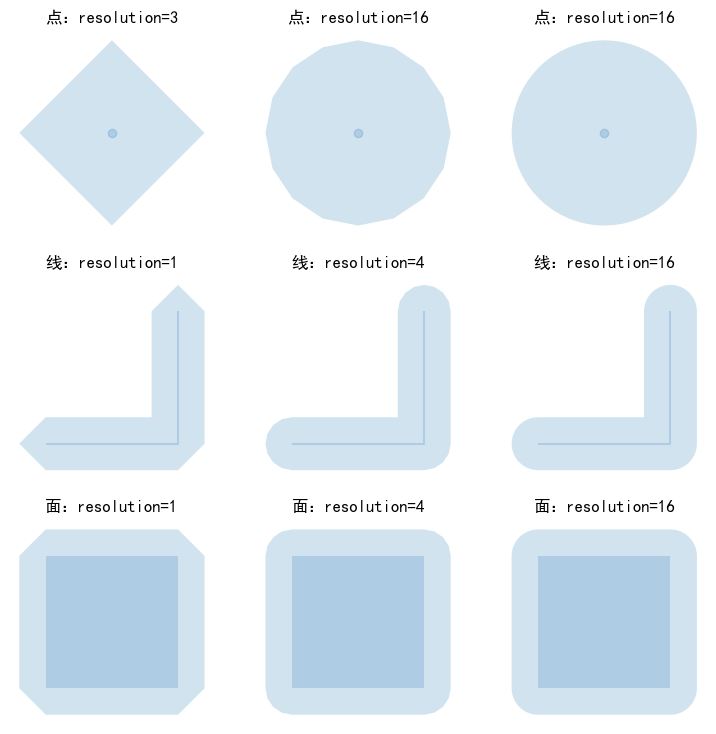

In [3]:
fig, axes = plt.subplots(3, 3, figsize=(9, 9))

axes = axes.flatten()

pt = shapely.geometry.Point([0, 0])
ls = shapely.geometry.LineString([(0, 0), (1, 0), (1, 1)])
polygon = shapely.geometry.Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])

axes[0] = gpd.GeoSeries([pt,
                         pt.buffer(distance=0.2, resolution=1)]) \
             .plot(ax=axes[0],
                   alpha=0.2)
axes[0].axis('off')
axes[0].set_title('点：resolution=3')

axes[1] = gpd.GeoSeries([pt,
                         pt.buffer(distance=0.2, resolution=4)]) \
             .plot(ax=axes[1],
                   alpha=0.2)
axes[1].axis('off')
axes[1].set_title('点：resolution=16')

axes[2] = gpd.GeoSeries([pt,
                         pt.buffer(distance=0.2, resolution=16)]) \
             .plot(ax=axes[2],
                   alpha=0.2)
axes[2].axis('off')
axes[2].set_title('点：resolution=16')

axes[3] = gpd.GeoSeries([ls,
                         ls.buffer(distance=0.2, resolution=1)]) \
             .plot(ax=axes[3],
                   alpha=0.2)
axes[3].axis('off')
axes[3].set_title('线：resolution=1')

axes[4] = gpd.GeoSeries([ls,
                         ls.buffer(distance=0.2, resolution=4)]) \
             .plot(ax=axes[4],
                   alpha=0.2)
axes[4].axis('off')
axes[4].set_title('线：resolution=4')

axes[5] = gpd.GeoSeries([ls,
                         ls.buffer(distance=0.2, resolution=16)]) \
             .plot(ax=axes[5],
                   alpha=0.2)
axes[5].axis('off')
axes[5].set_title('线：resolution=16')

axes[6] = gpd.GeoSeries([polygon,
                         polygon.buffer(distance=0.2, resolution=1)]) \
             .plot(ax=axes[6],
                   alpha=0.2)
axes[6].axis('off')
axes[6].set_title('面：resolution=1')

axes[7] = gpd.GeoSeries([polygon,
                         polygon.buffer(distance=0.2, resolution=4)]) \
             .plot(ax=axes[7],
                   alpha=0.2)
axes[7].axis('off')
axes[7].set_title('面：resolution=4')

axes[8] = gpd.GeoSeries([polygon,
                         polygon.buffer(distance=0.2, resolution=16)]) \
             .plot(ax=axes[8],
                   alpha=0.2)
axes[8].axis('off')
axes[8].set_title('面：resolution=16')

plt.show()
plt.savefig('图2.png', dpi=300, bbox_inches='tight', pad_inches=0)

<Figure size 640x480 with 0 Axes>

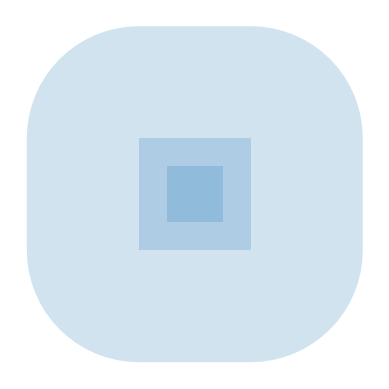

In [4]:
# 分别绘制多边形、多边形正向缓冲区、多边形负向缓冲区
ax = gpd.GeoSeries([polygon,
                    polygon.buffer(distance=1),
                    polygon.buffer(distance=-0.25)]) \
        .plot(alpha=0.2)
ax.axis('off')

plt.show()
plt.savefig('图3.png', dpi=300, bbox_inches='tight', pad_inches=0)

False


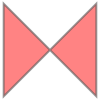

In [5]:
polygon = shapely.geometry.Polygon([(0, 0), (1, 1), (1, 0), (0, 1)])
print(polygon.is_valid)
polygon

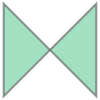

In [6]:
from shapely.validation import make_valid

make_valid(polygon)

In [7]:
type(make_valid(polygon))

shapely.geometry.multipolygon.MultiPolygon

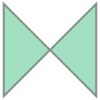

In [8]:
make_valid(polygon).buffer(1 / 1000000)

In [9]:
type(make_valid(polygon).buffer(1 / 1000000))

shapely.geometry.polygon.Polygon

- **total_bounds**

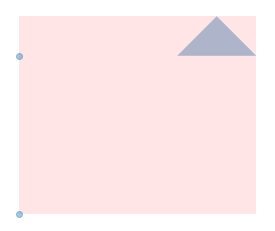

In [7]:
geom = gpd.GeoSeries([shapely.geometry.Point([0, 0]),
                      shapely.geometry.Point([0, 1]),
                      shapely.geometry.Polygon([(1, 1), (1.5, 1), (1.25, 1.25)])])

ax = geom.plot(alpha=0.4)

# 绘制total_bounds范围
ax = gpd.GeoSeries([shapely.geometry.box(*geom.total_bounds.tolist())]) \
        .plot(ax=ax,
              alpha=0.1,
              color='red')

ax.axis('off')

plt.savefig('图5.png', dpi=300, bbox_inches='tight', pad_inches=0)

- **simplify()**

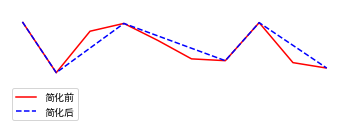

In [8]:
import numpy as np
import matplotlib.patches as mpatches

np.random.seed(10) # 固定随机数种子

# 创建线
line = shapely.geometry.LineString([(_, np.random.uniform(-1, 1)) for _ in range(10)])

# 绘制简化前
ax = gpd.GeoSeries([line]).plot(color='red')

# 绘制简化后
ax = gpd.GeoSeries([line]).simplify(tolerance=0.5).plot(color='blue', 
                                                        ax=ax,
                                                        linestyle='--')

# 制作图例映射对象列表
LegendElement = [plt.Line2D([], [], color='red', label='简化前'),
                 plt.Line2D([], [], color='blue', linestyle='--', label='简化后')]

# 将制作好的图例映射对象列表导入legend()中，并配置相关参数
ax.legend(handles = LegendElement, 
          loc='lower left', 
          fontsize=10)

ax.set_ylim((-2.5, 1))
ax.axis('off')
plt.savefig('图7.png', dpi=300, bbox_inches='tight', pad_inches=0)

- **unary_union**

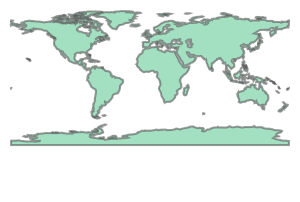

In [21]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.geometry.unary_union

In [22]:
type(world.geometry.unary_union)

shapely.geometry.multipolygon.MultiPolygon

(-0.575, 1.075, -0.05000000000000003, 1.05)

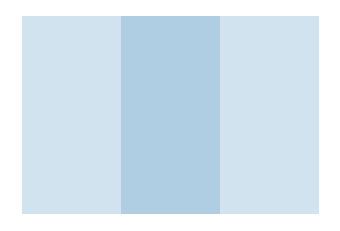

In [17]:
polygons = gpd.GeoSeries([shapely.geometry.Polygon([(0, 0), (1, 0), (1, 1), (0, 1)]),
                          shapely.geometry.Polygon([(-0.5, 0), (0.5, 0), (0.5, 1), (-0.5, 1)])])
ax = polygons.plot(alpha=0.2)
ax.axis('off')

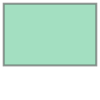

In [19]:
polygons.unary_union

In [20]:
polygons.unary_union.geom_type

'Polygon'

## 2.2 仿射变换

- **rotate()**

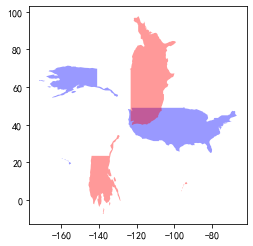

In [34]:
ax = world.query("iso_a3 == 'USA'").plot(color='blue',
                                         alpha=0.4)
ax = world.query("iso_a3 == 'USA'").rotate(angle=90,
                                           origin='center') \
                                   .plot(color='red',
                                         ax=ax,
                                         alpha=0.4)
plt.savefig('图10.png', dpi=300, bbox_inches='tight', pad_inches=0)

- **scale()**

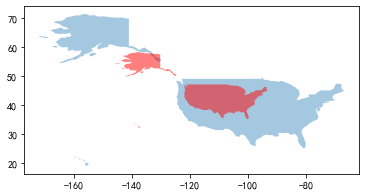

In [40]:
ax = world.query("iso_a3 == 'USA'").plot(alpha=0.4)

ax = world.query("iso_a3 == 'USA'").scale(xfact=0.5, yfact=0.5) \
                                   .plot(color='red',
                                         alpha=0.5,
                                         ax=ax)

plt.savefig('图11.png', dpi=300, bbox_inches='tight', pad_inches=0)

- **translate()**

In [41]:
gpd.GeoSeries([shapely.geometry.Point([0, 0])]) \
   .translate(xoff=1, yoff=1)

0    POINT (1.00000 1.00000)
dtype: geometry

## 2.3 叠加分析

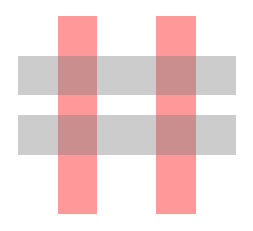

In [68]:
polygon1 = gpd.GeoDataFrame({
    'value1': [1, 2],
    'geometry': [shapely.geometry.Polygon([(1, 0), (3, 0), (3, 10), (1, 10)]),
                 shapely.geometry.Polygon([(6, 0), (8, 0), (8, 10), (6, 10)])]
})

polygon2 = gpd.GeoDataFrame({
    'value2': [3, 4],
    'geometry': [shapely.geometry.Polygon([(-1, 3), (-1, 5), (10, 5), (10, 3)]),
                 shapely.geometry.Polygon([(-1, 6), (-1, 8), (10, 8), (10, 6)])]
})

ax = polygon1.plot(color='red', alpha=0.4)
ax = polygon2.plot(color='grey', alpha=0.4, ax=ax)
ax.axis('off')
plt.savefig('图14.png', dpi=300, bbox_inches='tight', pad_inches=0)

- **how='union'**

In [75]:
overlay_result = gpd.overlay(df1=polygon1,
                             df2=polygon2,
                             how='union')
overlay_result

,value1,value2,geometry
0,1.0,3.0,"POLYGON ((1.00000 3.00000, 1.00000 5.00000, 3...."
1,2.0,3.0,"POLYGON ((6.00000 3.00000, 6.00000 5.00000, 8...."
2,1.0,4.0,"POLYGON ((1.00000 6.00000, 1.00000 8.00000, 3...."
3,2.0,4.0,"POLYGON ((6.00000 6.00000, 6.00000 8.00000, 8...."
4,1.0,NaN,"MULTIPOLYGON (((1.00000 0.00000, 1.00000 3.000..."
5,2.0,NaN,"MULTIPOLYGON (((6.00000 0.00000, 6.00000 3.000..."
6,NaN,3.0,"MULTIPOLYGON (((8.00000 5.00000, 10.00000 5.00..."
7,NaN,4.0,"MULTIPOLYGON (((8.00000 8.00000, 10.00000 8.00..."


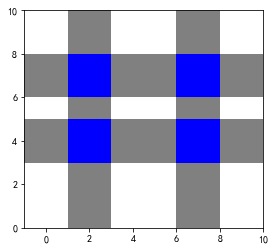

In [91]:
# 存在缺失值的行
ax = overlay_result[overlay_result.isna().any(axis=1)] \
                   .plot(color='grey')

# 不存在缺失值的行
ax = overlay_result[~overlay_result.isna().any(axis=1)] \
                   .plot(color='blue',
                         ax=ax)

ax.set_xlim((-1, 10))
ax.set_ylim((0, 10))
plt.savefig('图16.png', dpi=300, bbox_inches='tight', pad_inches=0)

- **how='intersection'**

In [92]:
overlay_result = gpd.overlay(df1=polygon1,
                             df2=polygon2,
                             how='intersection')
overlay_result

,value1,value2,geometry
0,1,3,"POLYGON ((1.00000 3.00000, 1.00000 5.00000, 3...."
1,2,3,"POLYGON ((6.00000 3.00000, 6.00000 5.00000, 8...."
2,1,4,"POLYGON ((1.00000 6.00000, 1.00000 8.00000, 3...."
3,2,4,"POLYGON ((6.00000 6.00000, 6.00000 8.00000, 8...."


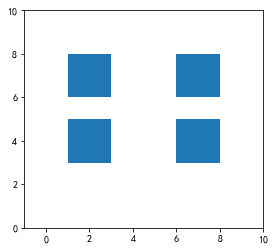

In [95]:
ax = overlay_result.plot()

ax.set_xlim((-1, 10))
ax.set_ylim((0, 10))
plt.savefig('图18.png', dpi=300, bbox_inches='tight', pad_inches=0)

- **how='difference'**

In [98]:
overlay_result = gpd.overlay(df1=polygon1,
                             df2=polygon2,
                             how='difference')
overlay_result

,value1,geometry
0,1,"MULTIPOLYGON (((1.00000 0.00000, 1.00000 3.000..."
1,2,"MULTIPOLYGON (((6.00000 0.00000, 6.00000 3.000..."


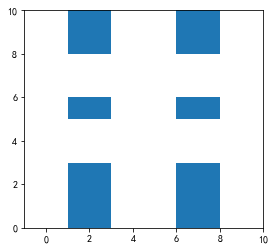

In [99]:
ax = overlay_result.plot()

ax.set_xlim((-1, 10))
ax.set_ylim((0, 10))
plt.savefig('图20.png', dpi=300, bbox_inches='tight', pad_inches=0)

- **how='symmetric_difference'**

In [100]:
overlay_result = gpd.overlay(df1=polygon1,
                             df2=polygon2,
                             how='symmetric_difference')
overlay_result

,value1,value2,geometry
0,1.0,NaN,"MULTIPOLYGON (((1.00000 0.00000, 1.00000 3.000..."
1,2.0,NaN,"MULTIPOLYGON (((6.00000 0.00000, 6.00000 3.000..."
2,NaN,3.0,"MULTIPOLYGON (((8.00000 5.00000, 10.00000 5.00..."
3,NaN,4.0,"MULTIPOLYGON (((8.00000 8.00000, 10.00000 8.00..."


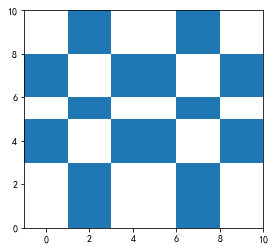

In [102]:
ax = overlay_result.plot()

ax.set_xlim((-1, 10))
ax.set_ylim((0, 10))
plt.savefig('图22.png', dpi=300, bbox_inches='tight', pad_inches=0)

- **how='identity'**

In [103]:
overlay_result = gpd.overlay(df1=polygon1,
                             df2=polygon2,
                             how='identity')
overlay_result

,value1,value2,geometry
0,1.0,3.0,"POLYGON ((1.00000 3.00000, 1.00000 5.00000, 3...."
1,2.0,3.0,"POLYGON ((6.00000 3.00000, 6.00000 5.00000, 8...."
2,1.0,4.0,"POLYGON ((1.00000 6.00000, 1.00000 8.00000, 3...."
3,2.0,4.0,"POLYGON ((6.00000 6.00000, 6.00000 8.00000, 8...."
4,1.0,NaN,"MULTIPOLYGON (((1.00000 0.00000, 1.00000 3.000..."
5,2.0,NaN,"MULTIPOLYGON (((6.00000 0.00000, 6.00000 3.000..."


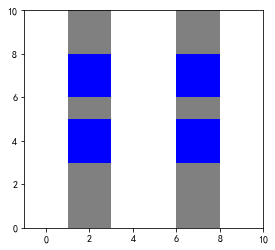

In [105]:
# 存在缺失值的行
ax = overlay_result[overlay_result.isna().any(axis=1)] \
                   .plot(color='grey')

# 不存在缺失值的行
ax = overlay_result[~overlay_result.isna().any(axis=1)] \
                   .plot(color='blue',
                         ax=ax)

ax.set_xlim((-1, 10))
ax.set_ylim((0, 10))
plt.savefig('图24.png', dpi=300, bbox_inches='tight', pad_inches=0)

- **keep_geom_type**

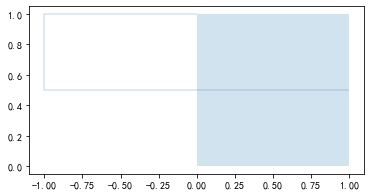

In [109]:
# 构造面
polygon = gpd.GeoDataFrame({
    'value1': [1],
    'geometry': [shapely.geometry.Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])]
})

# 构造线
line = gpd.GeoDataFrame({
    'value2': [2],
    'geometry': [shapely.geometry.LineString([(1, 0.5), (-1, 0.5), (-1, 1), (0, 1)])]
})

ax = polygon.plot(alpha=0.2)
ax = line.plot(alpha=0.2, ax=ax)

In [119]:
# 默认参数：keep_geom_type=True
gpd.overlay(df1=polygon,
            df2=line)

,value1,value2,geometry


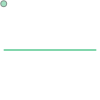

In [122]:
# 默认参数：keep_geom_type=False
gpd.overlay(df1=polygon,
            df2=line,
            keep_geom_type=False).unary_union

## 2.4 空间融合与拆分

- **dissolve()**

In [147]:
median = world['gdp_md_est'].median()
world['less_than_median_gdp'] = world['gdp_md_est'].apply(lambda x: 1 if x < median else 0)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,less_than_median_gdp
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",1
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0


In [152]:
world.dissolve(by='continent', aggfunc={'pop_est': 'sum',
                                        'gdp_md_est': 'sum'})

,geometry,pop_est,gdp_md_est
continent,,,
Africa,"MULTIPOLYGON (((32.830 -26.742, 32.580 -27.470...",1219176238,6025295.50
Antarctica,"MULTIPOLYGON (((-163.713 -78.596, -163.713 -78...",4050,810.00
Asia,"MULTIPOLYGON (((120.295 -10.259, 118.968 -9.55...",4389144868,55434607.77
Europe,"MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ...",746398461,25284877.00
North America,"MULTIPOLYGON (((-61.680 10.760, -61.105 10.890...",573042112,23505137.00
Oceania,"MULTIPOLYGON (((169.668 -43.555, 170.525 -43.0...",36782844,1412885.00
Seven seas (open ocean),"POLYGON ((68.935 -48.625, 69.580 -48.940, 70.5...",140,16.00
South America,"MULTIPOLYGON (((-66.960 -54.897, -67.291 -55.3...",418540749,6377091.80


- **explode()**

In [153]:
gpd.GeoDataFrame({
    'value1': [1],
    'value2': ['a'],
    'geometry': [shapely.geometry.MultiPoint([(0, 0), (1, 1), (2, 3)])]
})

,value1,value2,geometry
0,1,a,"MULTIPOINT (0.00000 0.00000, 1.00000 1.00000, ..."


In [154]:
gpd.GeoDataFrame({
    'value1': [1],
    'value2': ['a'],
    'geometry': [shapely.geometry.MultiPoint([(0, 0), (1, 1), (2, 3)])]
}).explode()

value1 value2                 geometry
0 0       1      a  POINT (0.00000 0.00000)
  1       1      a  POINT (1.00000 1.00000)
  2       1      a  POINT (2.00000 3.00000)